In [28]:
from google.colab import drive; drive.mount('/content/drive')

#Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import IPython.display as ipd
import networkx as nx
import matplotlib.colors as colors

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#Read data from the csv files and display
articles = pd.read_csv("/content/drive/MyDrive/Group 3/articles.leptospirosis.csv")
ipd.display(articles)

authors = pd.read_csv("/content/drive/MyDrive/Group 3/authors.leptospirosis.csv")
ipd.display(authors)

papercount = pd.read_csv("/content/drive/MyDrive/Group 3/paper_counts.csv")
ipd.display(papercount)


,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10548299,Risk factors for death and changing patterns i...,The risk factors for death and changes in clin...,0002-9637,The American journal of tropical medicine and ...,(61) 630-4,1999,E,Daher,E,"Departamento de Medicina Clínica, Faculdade de..."
1,10569777,Leptospiral outer membrane proteins OmpL1 and ...,New vaccine strategies are needed for preventi...,0019-9567,Infection and immunity,(67) 6572-82,1999,D A,Haake,DA,"Division of Infectious Diseases, Veterans Affa..."
2,10585813,Acute lung injury in leptospirosis: clinical a...,Forty-two consecutive patients with leptospiro...,1058-4838,Clinical infectious diseases : an official pub...,(29) 1561-3,1999,P C,Marotto,PC,"Intensive Care Unit, Instituto de Infectologia..."
3,10586903,Assessment of the efficacy of an IgM-elisa and...,In a prospective study in Barbados between 197...,0002-9637,The American journal of tropical medicine and ...,(61) 731-4,1999,P,Cumberland,P,"Infectious Disease Epidemiology Unit, London S..."
4,10596270,[An old disease with a new face: canine leptos...,The clinical features of the disease are prese...,0036-7281,Schweizer Archiv fur Tierheilkunde,(141) 499-507,1999,A,Steger-Lieb,A,"Klinik für kleine Haustiere, Universität Bern."
...,...,...,...,...,...,...,...,...,...,...,...
3384,38058661,Deeply jaundiced: Not so surgical after all.,Leptospirosis is an under-recognised disease i...,2313-1810,Southern African journal of infectious diseases,(38) 559,2023,Wesley P,du Plessis,WP,"Division of General Internal Medicine, Faculty..."
3385,38074946,Leptospirosis seroprevalence and risk factors ...,The objectives of this study were to determine...,2772-7076,IJID regions,(9) 125-130,2023,Sylvie,Zida,S,Institut de Recherche en Sciences de la Santé ...
3386,38081475,Leptospiral lipopolysaccharide dampens inflamm...,Leptospira interrogans are pathogenic bacteria...,1769-714X,Microbes and infection,S1286-4579(23)00184-3,2023,Delphine,Bonhomme,D,"Institut Pasteur, Université Paris Cité, CNRS ..."
3387,38087323,"Leptospirosis in Malaysia: current status, ins...","Among zoonotic infections, leptospirosis has a...",1880-6805,Journal of physiological anthropology,(42) 30,2023,Noraini,Philip,N,"School of Biological Sciences, Universiti Sain..."


,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10548299,1,E,Daher,E,"Departamento de Medicina Clínica, Faculdade de..."
1,10548299,2,D M,Zanetta,DM,NaN
2,10548299,3,M B,Cavalcante,MB,NaN
3,10548299,4,R C,Abdulkader,RC,NaN
4,10569777,1,D A,Haake,DA,"Division of Infectious Diseases, Veterans Affa..."
...,...,...,...,...,...,...
21326,38081475,7,Catherine,Werts,C,"Institut Pasteur, Université Paris Cité, CNRS ..."
21327,38087323,1,Noraini,Philip,N,"School of Biological Sciences, Universiti Sain..."
21328,38087323,2,Kamruddin,Ahmed,K,"Department of Pathology and Microbiology, Facu..."
21329,38094659,1,Guan-Sheng,Li,GS,"Department of Critical Medicine, Daomenkou, Ch..."


,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1
...,...,...
138,2020,1132241
139,2021,1277048
140,2022,1324650
141,2023,1302390


In [50]:
#Merge the articles and authors dataframes, so the articles show have all authors
fullauthors = pd.merge(articles, authors, on='PMID')

#Create a full name column using initials and last name
fullauthors["AuthorFullname"] = fullauthors['AuthorInitials'] + " " + fullauthors["AuthorLastname"]

#Create a first author full name column
fullauthors["FirstAuthorFullname"] = fullauthors["FirstAuthorInitials"] + " " + fullauthors["FirstAuthorLastname"]

    AuthorFullname  count
0            AI Ko     86
1      M Picardeau     78
2      W Lilenbaum     77
3   OA Dellagostin     60
4          MG Reis     57
5  SA Vasconcellos     56
6    RA Hartskeerl     56
7        N Koizumi     56
8          F Costa     41
9        C Goarant     41


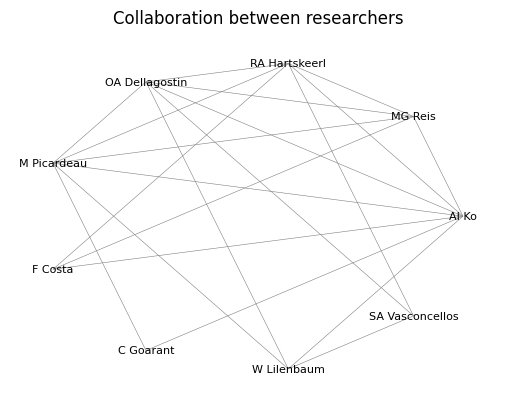

In [51]:
#Identify the 10 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:10]).reset_index()
print(frequentauthors)

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 10 name will be added
for i in range(10):
  #Dataframe containing all lines where the author is that top 10 name
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 10 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(frequentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])

  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(fulldf, 'CopyName', 'AuthorFullname')

#Adding title
plt.title("Collaboration between researchers")

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="black",
        linewidths=1,
        width=0.4,
        font_size=8,
        font_color="black",
        edge_color="gray", pos=nx.circular_layout(authornetwork))

#Saving the network
plt.savefig("AuthorCollab10.jpeg")


          AuthorFullname  count
0                  AI Ko     86
1            M Picardeau     78
2            W Lilenbaum     77
3         OA Dellagostin     60
4                MG Reis     57
5        SA Vasconcellos     56
6          RA Hartskeerl     56
7              N Koizumi     56
8                F Costa     41
9              C Goarant     41
10                 J Yan     39
11             JM Vinetz     39
12              DA Haake     38
13             EC Romero     38
14         P Vijayachari     37
15              JE Nally     37
16  K Natarajaseenivasan     36
17              P Bourhy     36
18             EA Wunder     32
19             LD Smythe     32
20              YF Chang     31
21               B Adler     30
22              SB Craig     29
23          MB Heinemann     28
24             G Martins     27
25         AL Nascimento     26
26              C Hamond     26
27            DD Hartwig     25
28             ML Vieira     25
29            J Benschop     24


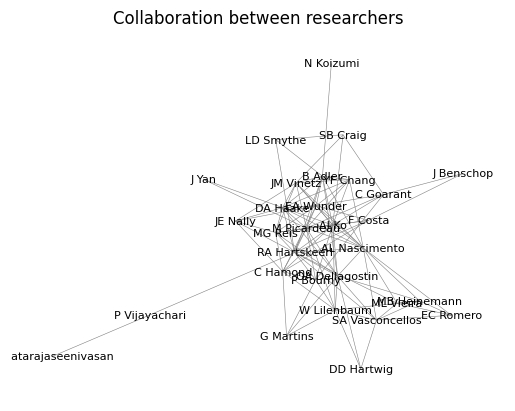

In [52]:
#Identify the 30 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:30]).reset_index()
print(frequentauthors)

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 30 name will be added
for i in range(30):
  #Dataframe containing all lines where the author is that top 10 name
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 10 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(frequentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])

  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(fulldf, 'CopyName', 'AuthorFullname')

#Adding title
plt.title("Collaboration between researchers")

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="black",
        linewidths=1,
        width=0.4,
        font_size=8,
        font_color="black",
        edge_color="gray")

#Saving the network
plt.savefig("AuthorCollab30.jpeg")

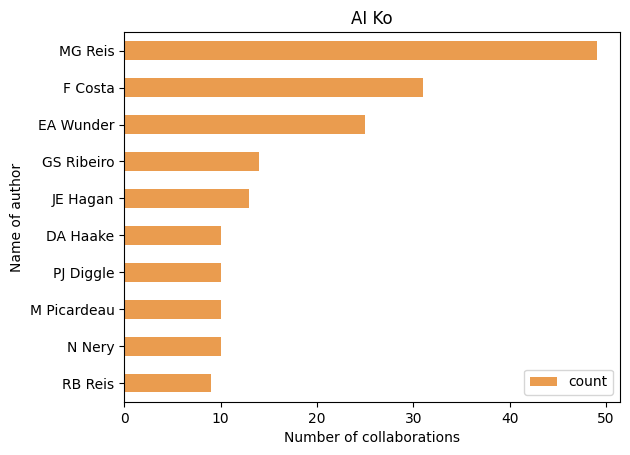

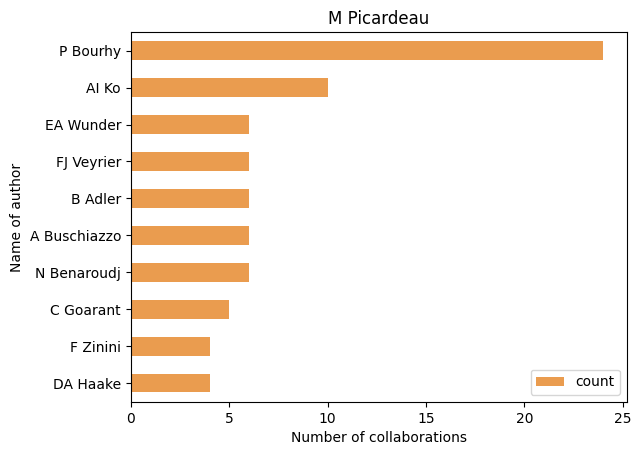

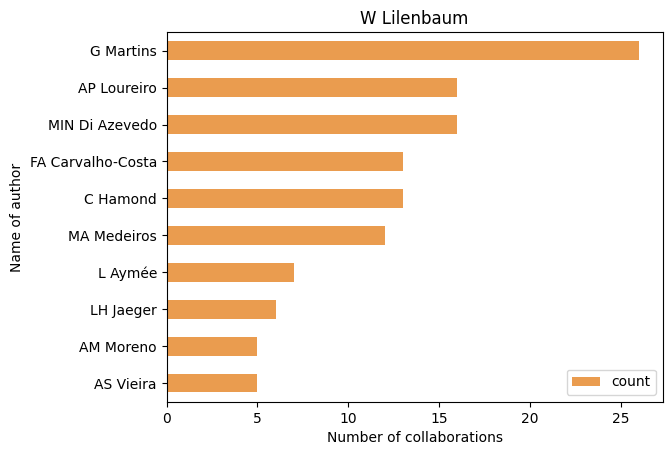

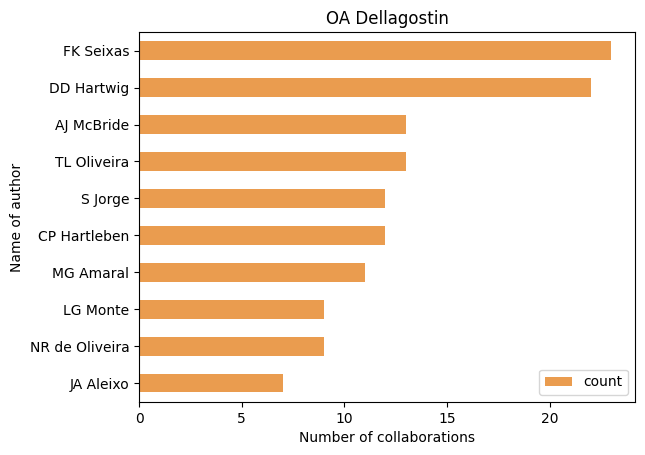

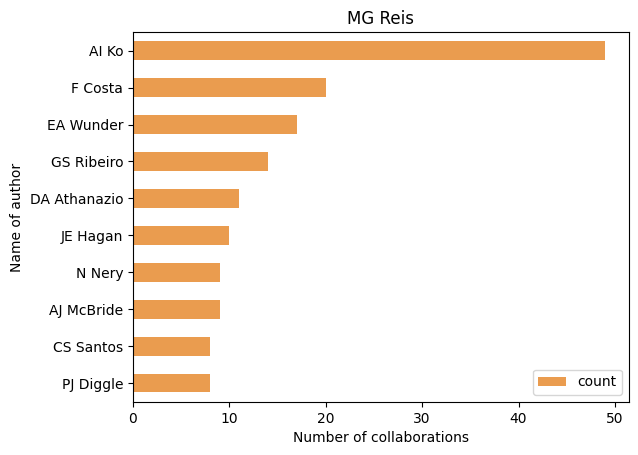

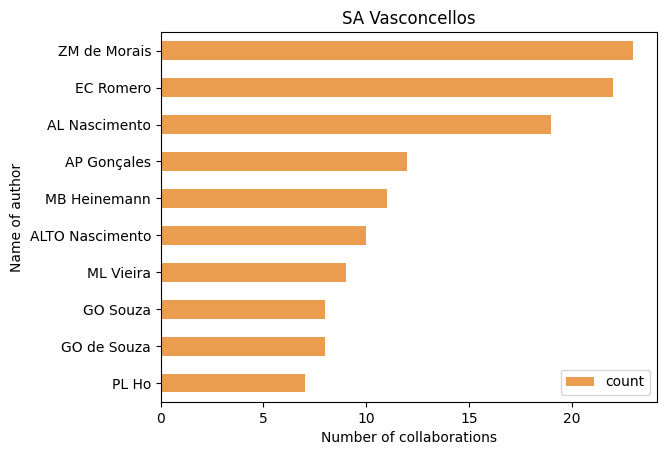

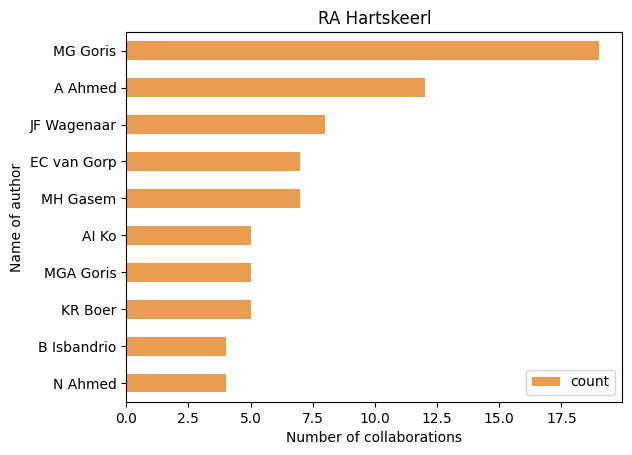

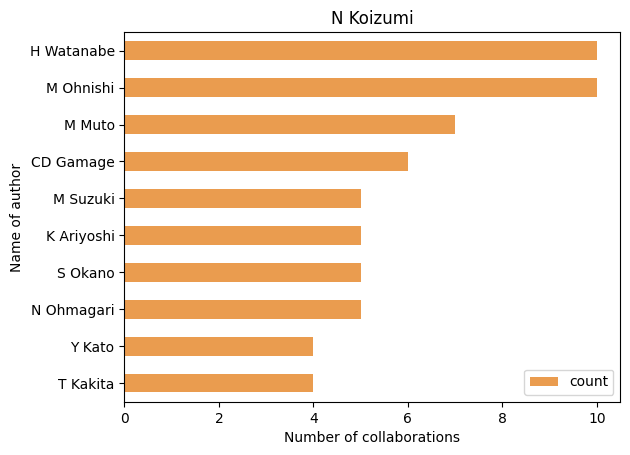

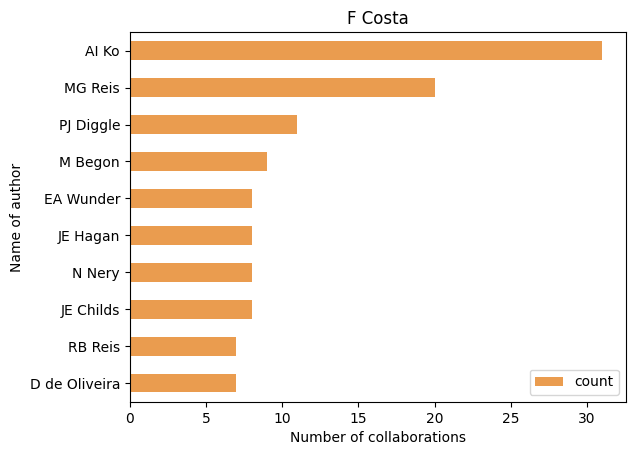

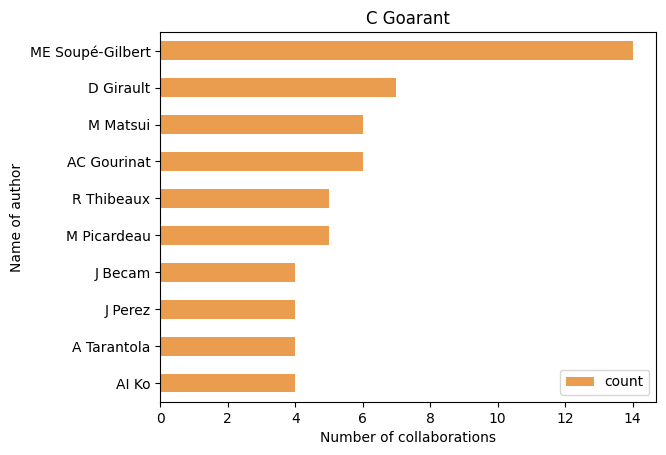

In [53]:
#---Horizontal bar charts showing the authors who have collaborated most with the top authors---

#Loop for each top author
for i in range(10):
  #Dataframe containing all lines where the author is that top author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all papers that the author is involved with
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])

  #List containing the top 10 authors that collaborated with that author
  collablist = df2["AuthorFullname"].value_counts()[:11].reset_index().iloc[::-1]
  #List containing all authors with more than 5 collaborations with that author
  #collablist = df2["AuthorFullname"].value_counts().reset_index().iloc[::-1]
  #collablist = collablist[collablist["count"] >= 5]

  #Removing any rows where the collaboration is with themself
  collablist = collablist[collablist["AuthorFullname"] != (frequentauthors["AuthorFullname"].iloc[i])]

  #Plotting a horizontal bar graph of the top collaborations with that author
  collablist.plot.barh(x="AuthorFullname",color="#ea9c4f")

  #Adding the title
  plt.title(frequentauthors["AuthorFullname"].iloc[i])
  #Adding the y-axis label
  plt.ylabel("Name of author")
  #Adding the x-axis label
  plt.xlabel("Number of collaborations")

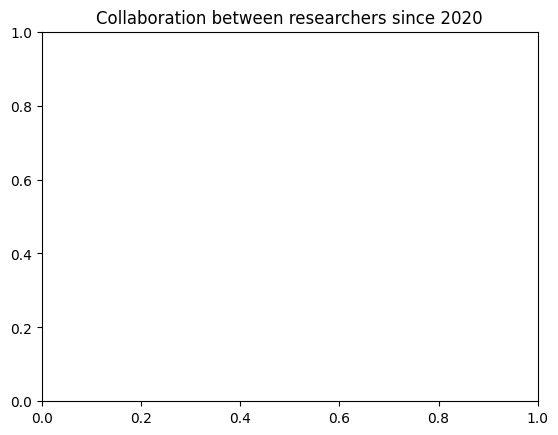

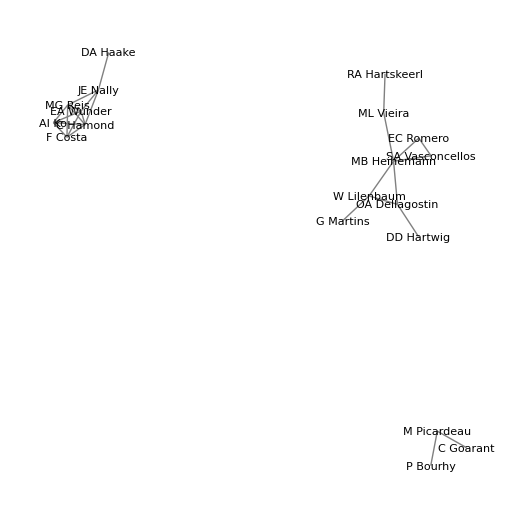

In [54]:
#Identify the 10 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:30]).reset_index()

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 30 author will be added
for i in range(30):
  #Dataframe containing all lines where the author is that top 10 author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 10 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(frequentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
  #Dataframe containing only collaborations that happened since 2020
  df3 = pd.DataFrame(df3[df3["Year"]>=2020])

  #Concatenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Creating the network of collaborations between authors
authornetwork = nx.from_pandas_edgelist(fulldf, 'CopyName', 'AuthorFullname')

#Adding title
plt.title("Collaboration between researchers since 2020")

#Setting the figure size
plt.figure(figsize=(5,5))

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="black",
        #linewidths=1,
        width=1,
        font_size=8,
        font_color="black",
        edge_color="gray")

#Saving the network
plt.savefig("AuthorCollabRecentTotal.jpeg")

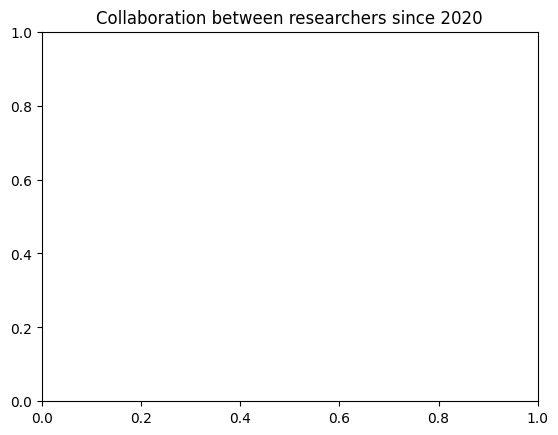

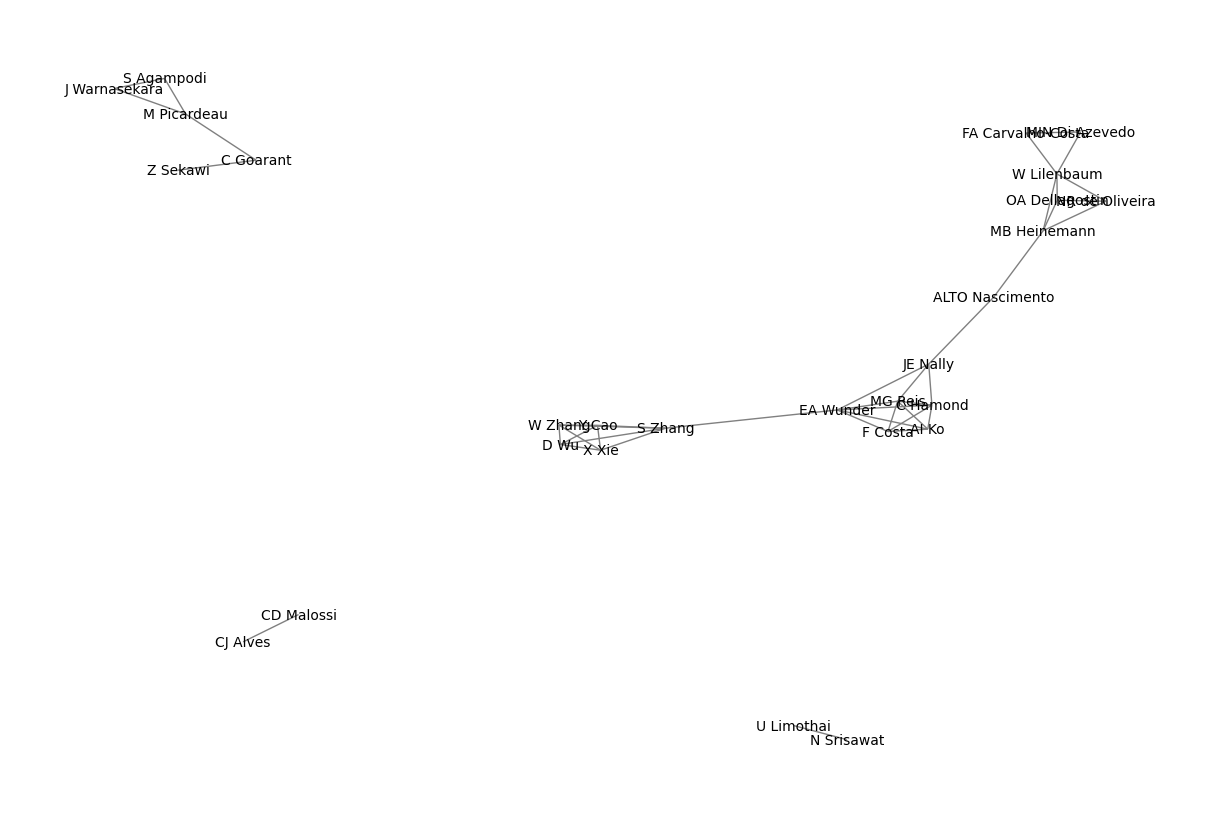

In [56]:
#Identify the 30 authors who have published most articles since 2020
recentauthors = fullauthors[fullauthors["Year"]>=2020]
recentauthors = recentauthors["AuthorFullname"].value_counts()[:30].reset_index()

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 30 author will be added
for i in range(30):
  #Dataframe containing all lines where the author is that top 10 author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (recentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = recentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 10 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(recentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
  #Dataframe containing only collaborations that happened since 2020
  df3 = pd.DataFrame(df3[df3["Year"]>=2020])

  #Concatenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Creating the network of collaborations between authors
authornetwork = nx.from_pandas_edgelist(fulldf, 'CopyName', 'AuthorFullname')

#Adding title
plt.title("Collaboration between researchers since 2020")

#Setting the figure size
plt.figure(figsize=(12,8))

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="black",
        linewidths=1,
        width=1,
        font_size=10,
        font_color="black",
        edge_color="gray")

#Saving the network
plt.savefig("AuthorCollabRecent.jpeg")

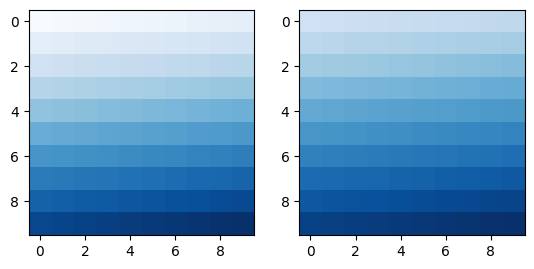

In [57]:
#---Adjusting the colourmap so the lower values aren't as light and show up better---

#Setting the original colourmap
cmap = plt.get_cmap('Blues')

#Truncating the colourmap to values in the 0.2-1 range, removing 0-0.2
new_cmap = colors.LinearSegmentedColormap.from_list('{cmap.name},0.2,1.0)',cmap(np.linspace(0.2, 1, 100)))

#Setting the dimensions of the figure by reshaping an ascending list of numbers
arr = np.linspace(0, 50, 100).reshape((10, 10))
#Making two plots next to each other
fig, ax = plt.subplots(ncols=2)

#Displaying the original colourmap
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
#Displaying the new colourmap
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
#Displaying the figure
plt.show()

,AuthorFullname,CopyName,size,sizelog
17,M Picardeau,W Lilenbaum,1,1.000000
6,AI Ko,W Lilenbaum,1,1.000000
15,M Picardeau,OA Dellagostin,1,1.000000
34,RA Hartskeerl,SA Vasconcellos,1,1.000000
11,F Costa,RA Hartskeerl,1,1.000000
16,M Picardeau,RA Hartskeerl,2,2.000000
14,M Picardeau,MG Reis,3,2.584963
26,OA Dellagostin,RA Hartskeerl,3,2.584963
22,MG Reis,RA Hartskeerl,3,2.584963
21,MG Reis,OA Dellagostin,4,3.000000


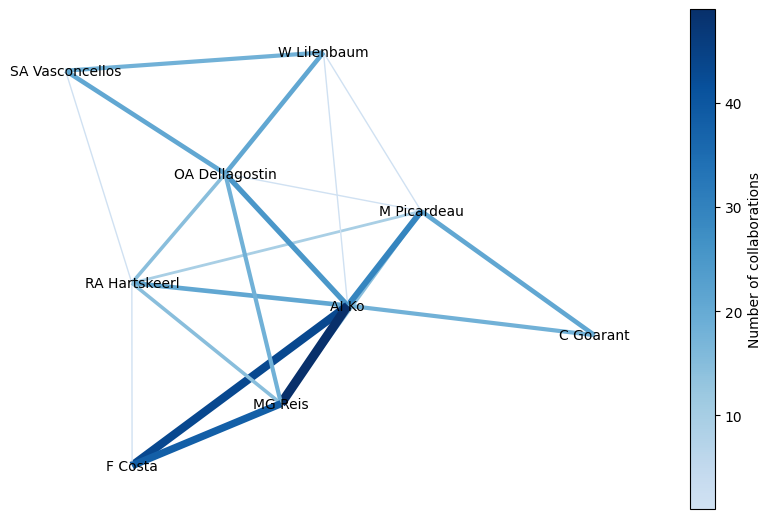

In [66]:
#---Collaborations between top 10 authors across the whole time period---


#Identify the 10 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:10]).reset_index()

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 10 name will be added
for i in range(10):
  #Dataframe containing all lines where the author is that top 10 name
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a column with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 10 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(frequentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Dataframe containing only the author name and the collaboration names
countdf = fulldf[["AuthorFullname","CopyName"]]

#Grouping the columns and counting the number of collaborations between each pair
countgrouped = countdf.groupby(countdf.columns.tolist(),as_index=False).size()

#Adding columns with the rows sorted alphabetically
countgrouped[['x', 'y']] = np.sort(countgrouped[['AuthorFullname', 'CopyName']], axis=1)

#Dropping duplicate rows of x and y, so each collaboration is counted once not twice
countdropped = countgrouped.drop_duplicates(['x', 'y']).drop(['x', 'y'], axis=1)

#Make a column for the log of the number of articles, to be used as scale for the width and colour
countdropped["sizelog"] = (np.log2(countdropped["size"])+1)
#Sorting by number of collaborations
countdropped = countdropped.sort_values('size')
#Display the collaborations dataframe
ipd.display(countdropped)

#Setting the figure size
plt.figure(figsize=(8,5))

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(countdropped, 'AuthorFullname', 'CopyName', edge_attr=['size','sizelog'], create_using=nx.Graph())

#Getting the weights for each edge of the network
weights = nx.get_edge_attributes(authornetwork,'sizelog').values()

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="blue",
        linewidths=1,
        width=list(weights), #Scaling width to number of collaborations
        font_size=10,
        font_color="black",
        edge_color=list(weights), #Scaling colour to number of edges
        pos=nx.kamada_kawai_layout(authornetwork),
        edge_cmap=new_cmap) #Setting the new cmap for colours

#Setting the range for the colourbar
colours=range(1,50)
vmin = min(colours)
vmax = max(colours)

#Setting the colourmap for the colourbar
cmap=new_cmap

#Making and plotting the colourbar
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,ax=plt.gca(),label="Number of collaborations")

#Saving the network
plt.savefig("AuthorCollab10.jpeg")

,AuthorFullname,CopyName,size,sizelog
38,B Adler,RA Hartskeerl,1,1.000000
130,M Picardeau,OA Dellagostin,1,1.000000
36,B Adler,N Koizumi,1,1.000000
37,B Adler,OA Dellagostin,1,1.000000
91,F Costa,RA Hartskeerl,1,1.000000
...,...,...,...,...
131,M Picardeau,P Bourhy,24,5.584963
5,AI Ko,EA Wunder,25,5.643856
95,G Martins,W Lilenbaum,26,5.700440
6,AI Ko,F Costa,31,5.954196


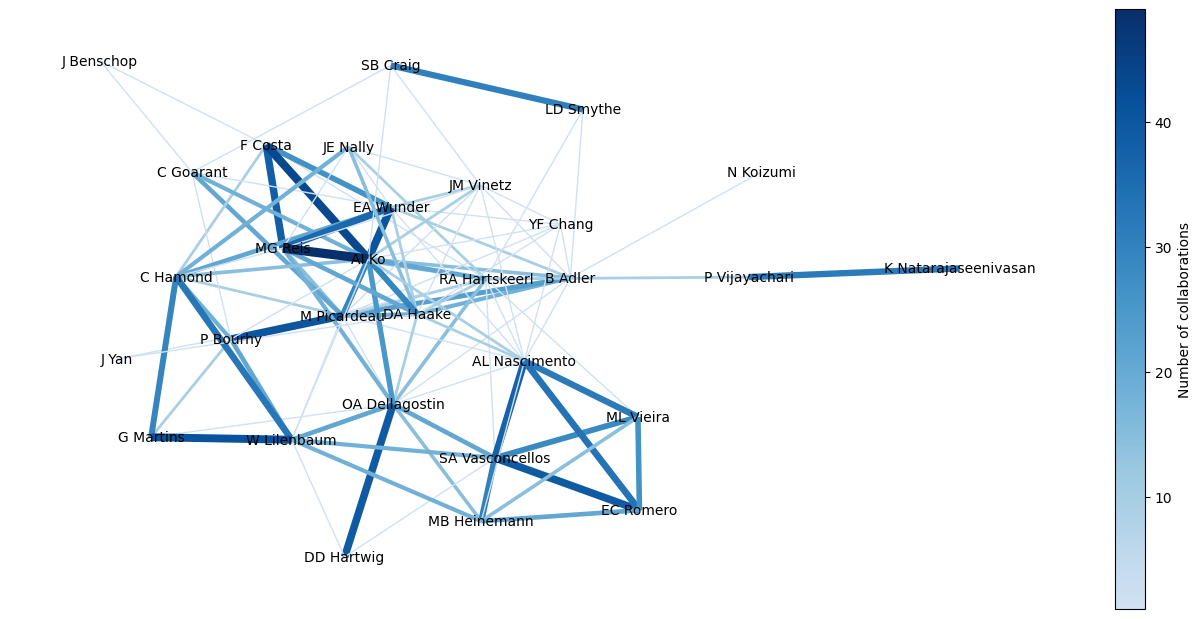

In [67]:
#---Collaborations between top 30 authors across the whole time period---


#Identify the 30 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:30]).reset_index()

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 30 name will be added
for i in range(30):
  #Dataframe containing all lines where the author is that top 30 name
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a column with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 30 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(frequentauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Dataframe containing only the author name and the collaboration names
countdf = fulldf[["AuthorFullname","CopyName"]]

#Grouping the columns and counting the number of collaborations between each pair
countgrouped = countdf.groupby(countdf.columns.tolist(),as_index=False).size()

#Adding columns with the rows sorted alphabetically
countgrouped[['x', 'y']] = np.sort(countgrouped[['AuthorFullname', 'CopyName']], axis=1)

#Dropping duplicate rows of x and y, so each collaboration is counted once not twice
countdropped = countgrouped.drop_duplicates(['x', 'y']).drop(['x', 'y'], axis=1)

#Make a column for the log of the number of articles, to be used as scale for the width and colour
countdropped["sizelog"] = (np.log2(countdropped["size"])+1)
#Sorting by number of collaborations
countdropped = countdropped.sort_values('size')
#Display the collaborations dataframe
ipd.display(countdropped)

#Setting the figure size
plt.figure(figsize=(13,6))

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(countdropped, 'AuthorFullname', 'CopyName', edge_attr=['size','sizelog'], create_using=nx.Graph())

#Getting the weights for each edge of the network
weights = nx.get_edge_attributes(authornetwork,'sizelog').values()

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="blue",
        linewidths=1,
        width=list(weights), #Scaling width to number of collaborations
        font_size=10,
        font_color="black",
        edge_color=list(weights), #Scaling colour to number of edges
        pos=nx.kamada_kawai_layout(authornetwork),
        edge_cmap=new_cmap) #Setting the new cmap for colours

#Setting the range for the colourbar
colours=range(1,50)
vmin = min(colours)
vmax = max(colours)

#Setting the colourmap for the colourbar
cmap=new_cmap

#Making and plotting the colourbar
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,ax=plt.gca(),label="Number of collaborations")

#Saving the network
plt.savefig("AuthorCollab30.jpeg")

,AuthorFullname,CopyName,size,sizelog
0,AI Ko,C Hamond,1,1.000000
34,MB Heinemann,W Lilenbaum,1,1.000000
32,MB Heinemann,OA Dellagostin,1,1.000000
27,JE Nally,MG Reis,1,1.000000
18,EC Romero,SA Vasconcellos,1,1.000000
41,ML Vieira,RA Hartskeerl,1,1.000000
11,DD Hartwig,OA Dellagostin,1,1.000000
9,C Hamond,MG Reis,1,1.000000
15,EA Wunder,JE Nally,1,1.000000
44,OA Dellagostin,W Lilenbaum,1,1.000000


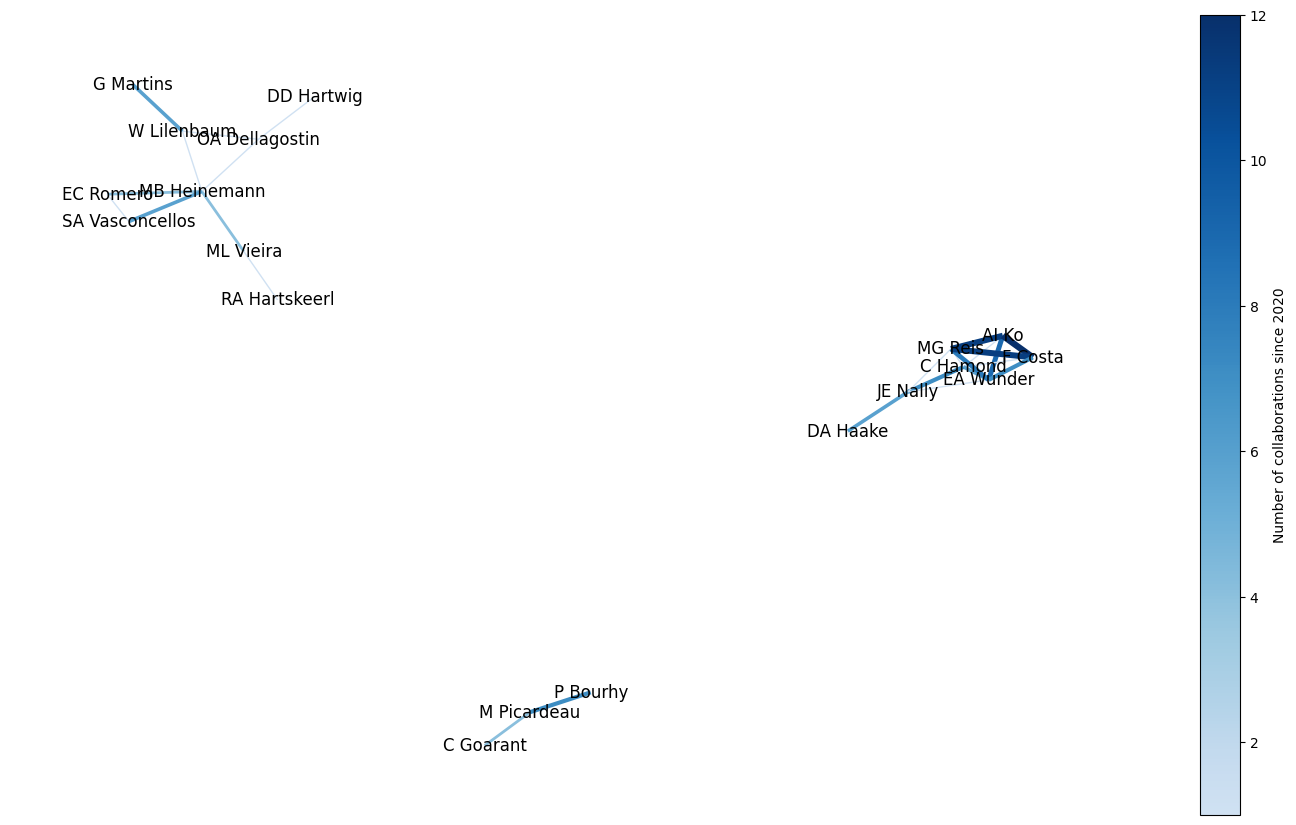

In [69]:
#---Collaborations between the top 30 authors across the whole time period, on papers since 2020---


#Identify the 30 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:30]).reset_index()

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 30 name will be added
for i in range(30):
  #Dataframe containing all lines where the author is that top 30 name
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a column with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 30 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(frequentauthors["AuthorFullname"])])
  #Keep only rows where the paper was published in 2020 or more recently
  df3 = pd.DataFrame(df3[df3["Year"]>=2020])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Dataframe containing only the author name and the collaboration names
countdf = fulldf[["AuthorFullname","CopyName"]]

#Grouping the columns and counting the number of collaborations between each pair
countgrouped = countdf.groupby(countdf.columns.tolist(),as_index=False).size()

#Adding columns with the rows sorted alphabetically
countgrouped[['x', 'y']] = np.sort(countgrouped[['AuthorFullname', 'CopyName']], axis=1)

#Dropping duplicate rows of x and y, so each collaboration is counted once not twice
countdropped = countgrouped.drop_duplicates(['x', 'y']).drop(['x', 'y'], axis=1)

#Make a column for the log of the number of articles, to be used as scale for the width and colour
countdropped["sizelog"] = (np.log2(countdropped["size"])+1)
#Sorting by number of collaborations
countdropped = countdropped.sort_values('size')
#Display the collaborations dataframe
ipd.display(countdropped)

#Setting the figure size
plt.figure(figsize=(14,8))

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(countdropped, 'AuthorFullname', 'CopyName', edge_attr=['size','sizelog'], create_using=nx.Graph())

#Getting the weights for each edge of the network
weights = nx.get_edge_attributes(authornetwork,'sizelog').values()

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="blue",
        linewidths=1,
        width=list(weights), #Scaling width to number of collaborations
        font_size=12,
        font_color="black",
        edge_color=list(weights), #Scaling colour to number of edges
        pos=nx.spring_layout(authornetwork),
        edge_cmap=new_cmap) #Setting the new cmap for colours

#Setting the range for the colourbar
colours=range(1,13)
vmin = min(colours)
vmax = max(colours)

#Setting the colourmap for the colourbar
cmap=new_cmap

#Making and plotting the colourbar
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,ax=plt.gca(),label="Number of collaborations since 2020")

#Saving the network
plt.savefig("AuthorCollabRecentTotal.jpeg")


,AuthorFullname,CopyName,size,sizelog
0,AI Ko,C Hamond,1,1.000000
57,OA Dellagostin,W Lilenbaum,1,1.000000
54,NR de Oliveira,W Lilenbaum,1,1.000000
43,MB Heinemann,W Lilenbaum,1,1.000000
42,MB Heinemann,OA Dellagostin,1,1.000000
41,MB Heinemann,NR de Oliveira,1,1.000000
39,M Picardeau,S Agampodi,1,1.000000
36,JE Nally,MG Reis,1,1.000000
31,J Warnasekara,M Picardeau,1,1.000000
22,EA Wunder,JE Nally,1,1.000000


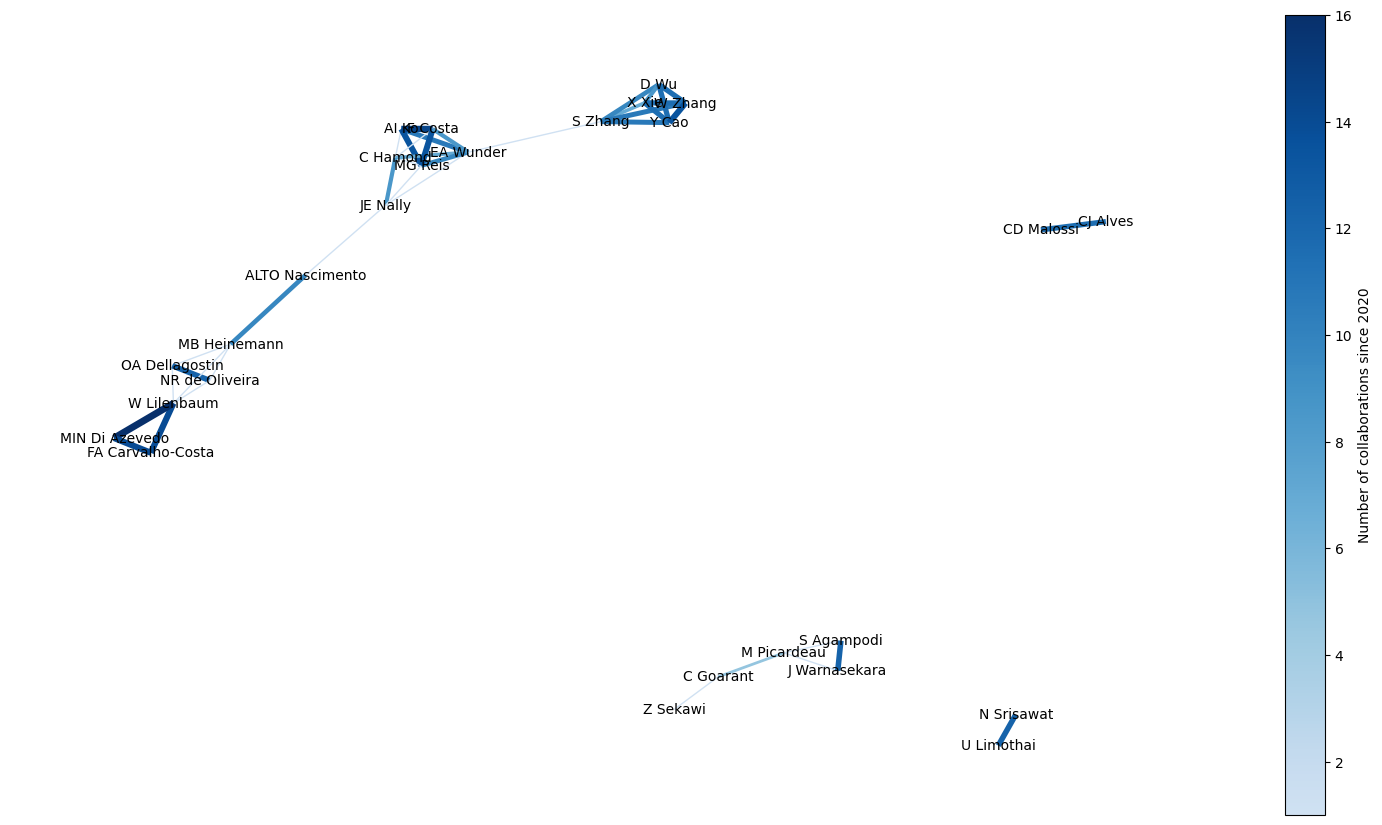

In [80]:
#---Collaborations between the 30 authors who published most since 2020, on papers since 2020---


#Identify the 30 authors who have published most articles since 2020
recentauthors = fullauthors[fullauthors["Year"]>=2020]
recentauthors = recentauthors["AuthorFullname"].value_counts()[:30].reset_index()

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 30 name will be added
for i in range(30):
  #Dataframe containing all lines where the author is that top 30 name
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (recentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a column with that author name
  df2["CopyName"] = recentauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that are in the top 30 authors
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(recentauthors["AuthorFullname"])])
  #Keep only rows where the paper was published in 2020 or more recently
  df3 = pd.DataFrame(df3[df3["Year"]>=2020])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Dataframe containing only the author name and the collaboration names
countdf = fulldf[["AuthorFullname","CopyName"]]

#Grouping the columns and counting the number of collaborations between each pair
countgrouped = countdf.groupby(countdf.columns.tolist(),as_index=False).size()

#Adding columns with the rows sorted alphabetically
countgrouped[['x', 'y']] = np.sort(countgrouped[['AuthorFullname', 'CopyName']], axis=1)

#Dropping duplicate rows of x and y, so each collaboration is counted once not twice
countdropped = countgrouped.drop_duplicates(['x', 'y']).drop(['x', 'y'], axis=1)

#Make a column for the log of the number of articles, to be used as scale for the width and colour
countdropped["sizelog"] = (np.log2(countdropped["size"])+1)
#Sorting by number of collaborations
countdropped = countdropped.sort_values('size')
#Display the collaborations dataframe
ipd.display(countdropped)

#Setting the figure size
plt.figure(figsize=(15,8))

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(countdropped, 'AuthorFullname', 'CopyName', edge_attr=['size','sizelog'], create_using=nx.Graph())

#Getting the weights for each edge of the network
weights = nx.get_edge_attributes(authornetwork,'sizelog').values()

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="blue",
        linewidths=1,
        width=list(weights), #Scaling width to number of collaborations
        font_size=10,
        font_color="black",
        edge_color=list(weights), #Scaling colour to number of edges
        pos=nx.spring_layout(authornetwork),
        edge_cmap=new_cmap) #Setting the new cmap for colours

#Setting the range for the colourbar
colours=range(1,17)
vmin = min(colours)
vmax = max(colours)

#Setting the colourmap for the colourbar
cmap=new_cmap

#Making and plotting the colourbar
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,ax=plt.gca(),label="Number of collaborations since 2020")

#Saving the network
plt.savefig("AuthorCollabRecent.jpeg")

,AuthorFullname,CopyName,size,sizelog,sizedivide
1118,J Croda,MG Reis,5,3.321928,0.5
563,D de Oliveira,AI Ko,5,3.321928,0.5
574,DA Haake,MG Reis,5,3.321928,0.5
2113,R Thibeaux,C Goarant,5,3.321928,0.5
713,EF Silva,MG Reis,5,3.321928,0.5
...,...,...,...,...,...
1948,P Bourhy,M Picardeau,24,5.584963,2.4
687,EA Wunder,AI Ko,25,5.643856,2.5
885,G Martins,W Lilenbaum,26,5.700440,2.6
189,AI Ko,F Costa,31,5.954196,3.1


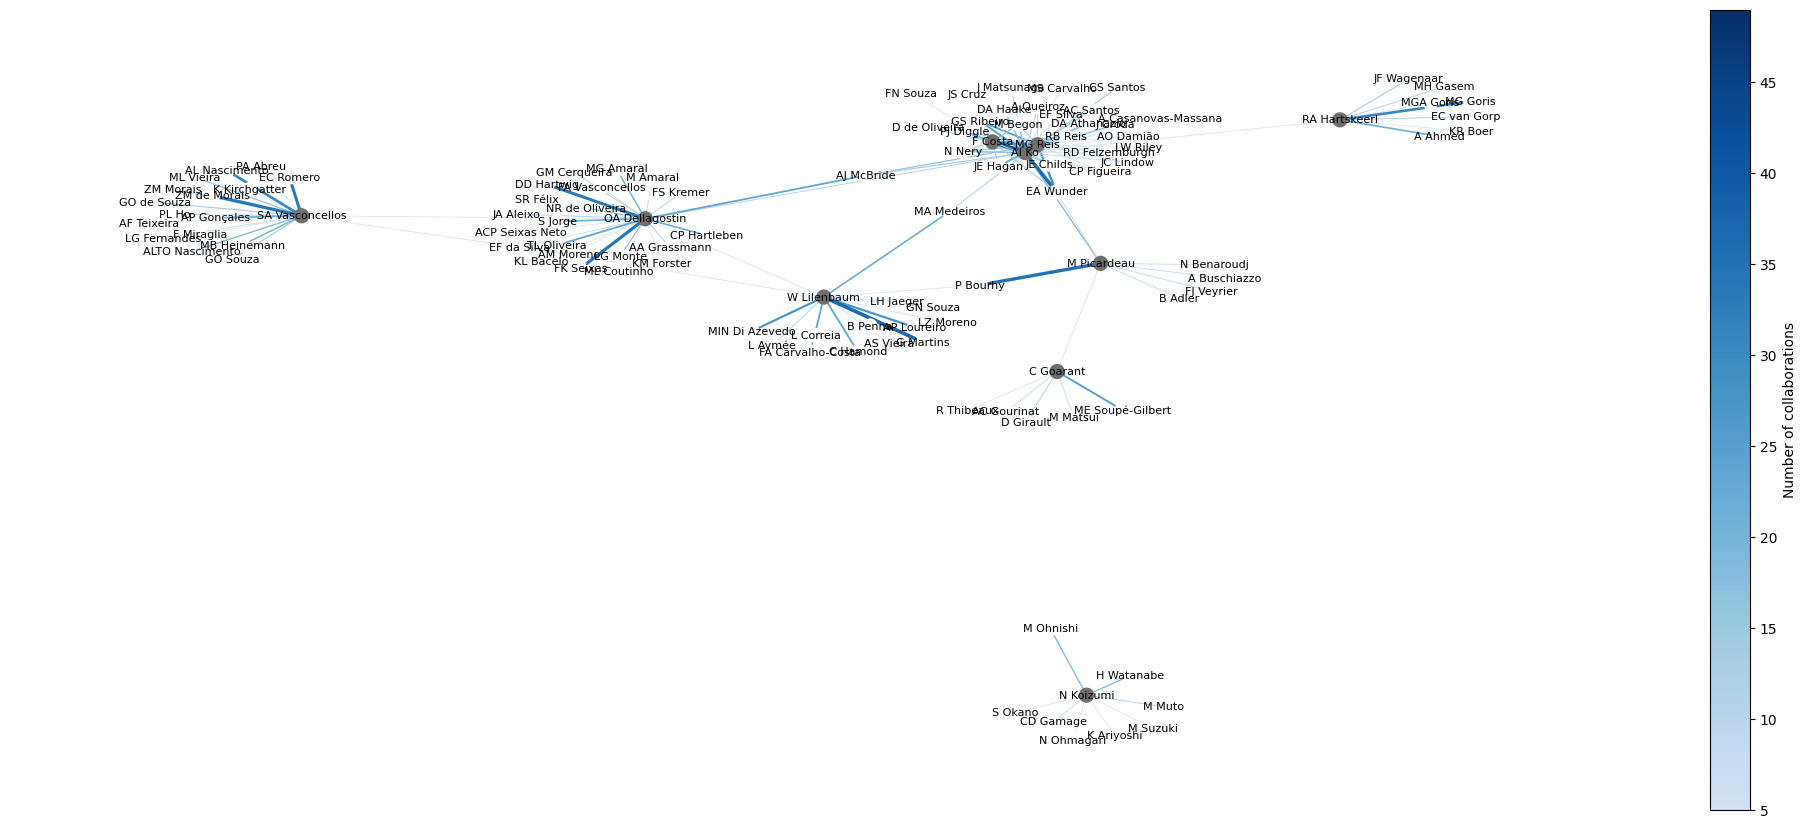

In [86]:
#---All authors with 5 or more collaborations with one or more of the top 10 authors---


#Identify the 10 authors who have published most articles
frequentauthors = (fullauthors['AuthorFullname'].value_counts()[:10]).reset_index()

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop so each top 10 name will be added
for i in range(10):
  #Dataframe containing all lines where the author is that top 30 name
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (frequentauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a column with that author name
  df2["CopyName"] = frequentauthors["AuthorFullname"].iloc[i]
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df2[df2["AuthorFullname"] != df2["CopyName"]])
  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Dataframe containing only the author name and the collaboration names
countdf = fulldf[["AuthorFullname","CopyName"]]

#Grouping the columns and counting the number of collaborations between each pair
countgrouped = countdf.groupby(countdf.columns.tolist(),as_index=False).size()
#Only use rows where there are 5 or more collaborations
countgrouped = countgrouped[countgrouped["size"] >= 5]

#Adding columns with the rows sorted alphabetically
countgrouped[['x', 'y']] = np.sort(countgrouped[['AuthorFullname', 'CopyName']], axis=1)

#Dropping duplicate rows of x and y, so each collaboration is counted once not twice
countdropped = countgrouped.drop_duplicates(['x', 'y']).drop(['x', 'y'], axis=1)

#Make a column for the log of the number of articles, to be used as scale for the colour
countdropped["sizelog"] = (np.log2(countdropped["size"])+1)
#Make a column for the number of articles divided by 10, to be used as a scale for the width
countdropped["sizedivide"] = countdropped["size"]/10

#Sorting by number of collaborations
countdropped = countdropped.sort_values('size')
#Display the collaborations dataframe
ipd.display(countdropped)

#Setting the figure size
plt.figure(figsize=(20,8))

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(countdropped, 'CopyName', 'AuthorFullname', edge_attr=['sizedivide','sizelog'], create_using=nx.Graph())

#Getting the weights for each edge of the network
strengths = nx.get_edge_attributes(authornetwork,'sizedivide').values()
weights = nx.get_edge_attributes(authornetwork,'sizelog').values()

#Concatenating the copy name and author full name columns into one column
colourdf = pd.DataFrame(pd.concat([countdropped['CopyName'], countdropped['AuthorFullname']], ignore_index=True))
#Getting only one copy of each author name
colourdf = colourdf.drop_duplicates()

#Setting the colour value to True if the name is a top author
colourdf["colour"] = colourdf[0].isin(frequentauthors["AuthorFullname"])
#Replacing the True and False values with colour codes
colourdf = colourdf.replace(True, "#6f6f6f")
colourdf = colourdf.replace(False, "#ffffff")

#Setting the index to the author name
colourdf = colourdf.set_index(0)
#Reindexing using the network nodes, so top authors will be a different colour
colourdf = colourdf.reindex(authornetwork.nodes())

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=100,
        node_shape="o",
        node_color=colourdf["colour"].astype(str), #Setting colour of nodes depending on author
        linewidths=1,
        width=list(strengths), #Scaling width to number of collaborations
        font_size=8,
        font_color="black",
        edge_color=list(weights), #Scaling colour to number of edges
        pos=nx.spring_layout(authornetwork),
        edge_cmap=new_cmap) #Setting the new cmap for colours

#Setting the range for the colourbar
colours=range(5,50)
vmin = min(colours)
vmax = max(colours)

#Setting the colourmap for the colourbar
cmap=new_cmap

#Making and plotting the colourbar
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,ax=plt.gca(),label="Number of collaborations")

#Saving the network
plt.savefig("AuthorCollabMore10.jpeg")


,AuthorFullname,CopyName,size
628,J Warnasekara,S Agampodi,10
131,ALTO Nascimento,SA Vasconcellos,10
291,CW Yang,YC Tian,10
788,M Ohnishi,N Koizumi,10
649,JE Hagan,MG Reis,10
...,...,...,...
816,M Picardeau,P Bourhy,24
51,AI Ko,EA Wunder,25
511,G Martins,W Lilenbaum,26
52,AI Ko,F Costa,31


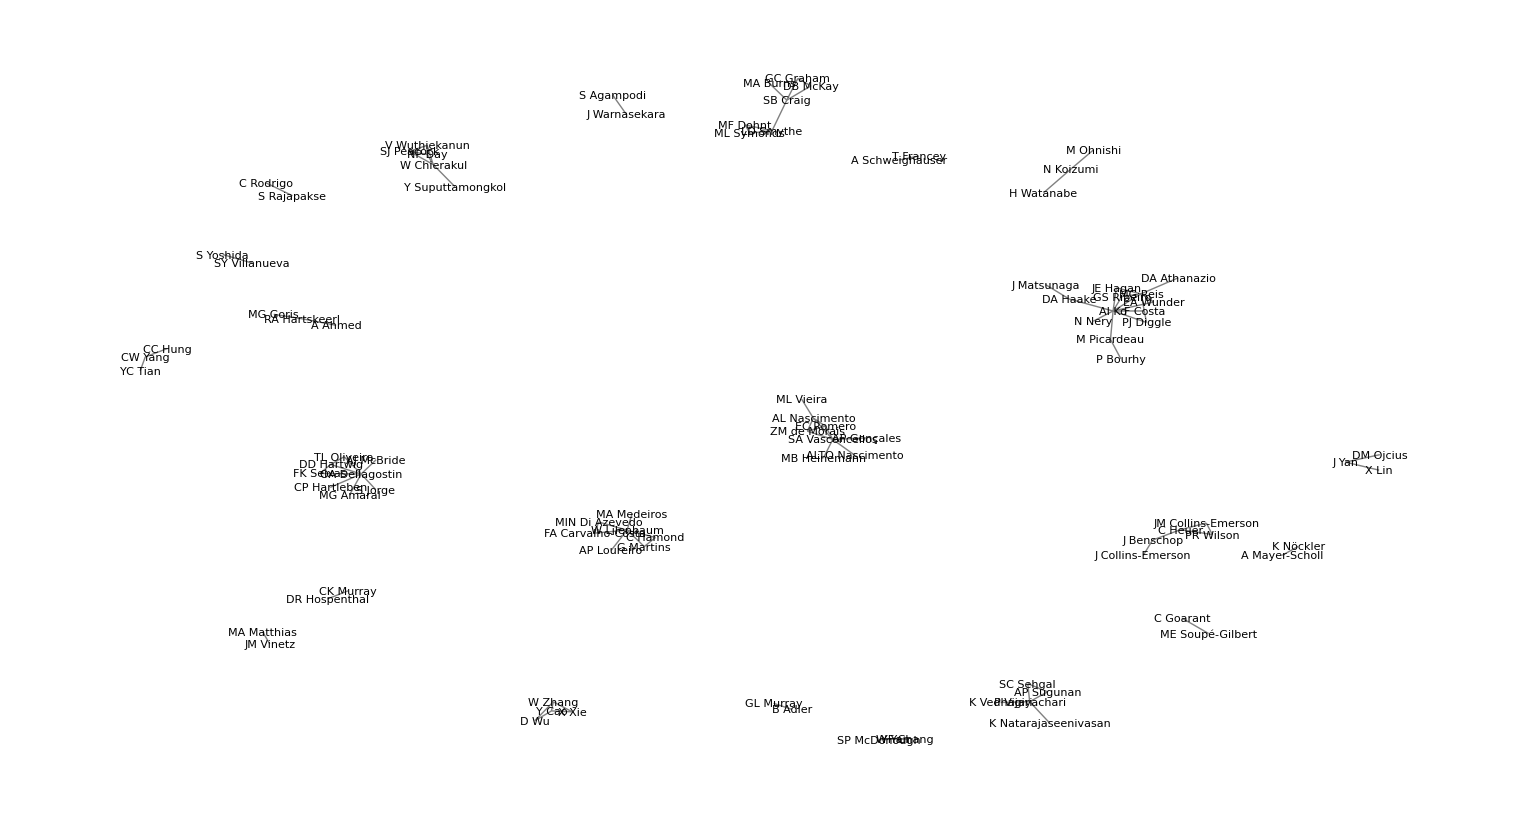

In [87]:
#---Any authors who have 10 or more collaborations with another author---


#Identify all authors who have published 10 or more articles
uniqueauthors = fullauthors['AuthorFullname'].value_counts().reset_index()
uniqueauthors = uniqueauthors[uniqueauthors['count'] >= 10]

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop to run through each author
for i in range(len(uniqueauthors)):
  #Dataframe containing all lines where the author is the specific author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (uniqueauthors["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a column with that author name
  df2["CopyName"] = uniqueauthors["AuthorFullname"].iloc[i]
  #Dataframe containing all authors on those papers that have published at least 10 papers
  df3 = pd.DataFrame(df2[df2["AuthorFullname"].isin(uniqueauthors["AuthorFullname"])])
  #Removing collaborations between the author and themself
  df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
  #Concetenating that dataframe to the total dataframe
  fulldf = pd.concat([fulldf,df3])

#Dataframe containing only the author name and the collaboration names
countdf = fulldf[["AuthorFullname","CopyName"]]

#Grouping the columns and counting the number of collaborations between each pair
countgrouped = countdf.groupby(countdf.columns.tolist(),as_index=False).size()
#Only use rows where there are 10 or more collaborations
countgrouped = countgrouped[countgrouped["size"] >= 10]

#Adding columns with the rows sorted alphabetically
countgrouped[['x', 'y']] = np.sort(countgrouped[['AuthorFullname', 'CopyName']], axis=1)

#Dropping duplicate rows of x and y, so each collaboration is counted once not twice, then dropping the x and y columns
countdropped = countgrouped.drop_duplicates(['x', 'y']).drop(['x', 'y'], axis=1)

#Sorting by number of collaborations
countdropped = countdropped.sort_values('size')
#Display the collaborations dataframe
ipd.display(countdropped)

#Setting the figure size
plt.figure(figsize=(15,8))

#Creating the network of collaboration between authors
authornetwork = nx.from_pandas_edgelist(countdropped, 'CopyName', 'AuthorFullname', create_using=nx.Graph())

#Drawing the network and adjusting how it looks
nx.draw(authornetwork, with_labels=True,
        node_size=0,
        node_shape="o",
        node_color="blue",
        linewidths=1,
        width=1,
        font_size=8,
        font_color="black",
        edge_color="gray",
        pos=nx.spring_layout(authornetwork))

#Saving the network
plt.savefig("AuthorCollabAll10.jpeg")

In [88]:
#---Examining the papers that different groups from the network diagram using papers from 2020 collaborated on, to identify differences in topic focus or journals published in---


#List of authors from one of the groups
authorlist = pd.DataFrame({"AuthorFullname": ["AI Ko","MG Reis","F Costa","EA Wunder", "C Hamond", "JE Nally", "DA Haake"]})

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop through each author in the group
for i in range(len(authorlist)):
  #The author that this loop is examining
  mainauth = authorlist["AuthorFullname"].iloc[i]
  #Dataframe containing all lines with that author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (authorlist["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = authorlist["AuthorFullname"].iloc[i]
  #Only keep rows where the paper was published in 2020 or more recently
  df2 = pd.DataFrame(df2[df2["Year"]>=2020])
  #Loop through each author in the group
  for j in range(len(authorlist)):
    #The author that this loop is examining
    thisauth = authorlist["AuthorFullname"].iloc[j]
    #Dataframe of rows with papers by this author
    df3 = pd.DataFrame(df2[df2["AuthorFullname"] == (authorlist["AuthorFullname"].iloc[j])])
    #Removing collaborations between the author and themself
    df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
    #Dataframe with only relevant categories
    df4 = df3[["PMID","Title","Abstract","Journal","AuthorFullname","CopyName"]]
    #Print the names of the two authors that the collaborations are between
    print(f"Collaborations between {mainauth} and {thisauth}:")
    #Display the collaborations between these authors, using maximum column width to display the whole title
    with pd.option_context('display.max_colwidth', None):
      display(df4[["Title","Journal"]])

    #Concatenate the dataframe to the total dataframe
    fulldf = pd.concat([fulldf,df4])

#Group by journal and count, then sort by the number of papers published in each journal
groupeddf = fulldf.groupby(["Journal"]).count().sort_values('PMID',ascending=False)
#Display the journals and number of publications for the group
ipd.display(groupeddf['PMID'])

Collaborations between AI Ko and AI Ko:


,Title,Journal


Collaborations between AI Ko and MG Reis:


,Title,Journal
16017,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
16722,"Anicteric Leptospirosis-Associated Meningitis in a Tropical Urban Environment, Brazil.",Emerging infectious diseases
16770,A multivariate geostatistical framework for combining multiple indices of abundance for disease vectors and reservoirs: a case study of,"Journal of the Royal Society, Interface"
17540,Household rat infestation in urban slum populations: Development and validation of a predictive score for leptospirosis.,PLoS neglected tropical diseases
17695,"Poverty, sanitation, and Leptospira transmission pathways in residents from four Brazilian slums.",PLoS neglected tropical diseases
17937,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19110,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19178,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine
19612,"Evaluation of the impact of chemical control on the ecology of Rattus norvegicus of an urban community in Salvador, Brazil.",PloS one
20436,"Why is leptospirosis hard to avoid for the impoverished? Deconstructing leptospirosis transmission risk and the drivers of knowledge, attitudes, and practices in a disadvantaged community in Salvador, Brazil.",PLOS global public health


Collaborations between AI Ko and F Costa:


,Title,Journal
16020,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
16774,A multivariate geostatistical framework for combining multiple indices of abundance for disease vectors and reservoirs: a case study of,"Journal of the Royal Society, Interface"
17157,Effects of Accounting for Interval-Censored Antibody Titer Decay on Seroincidence in a Longitudinal Cohort Study of Leptospirosis.,American journal of epidemiology
17282,Spatial and Simultaneous Seroprevalence of Anti-,Frontiers in veterinary science
17349,"Knowledge, Attitude, and Practices regarding Leptospirosis among Visitors to a Recreational Forest in Malaysia.",The American journal of tropical medicine and hygiene
17531,Household rat infestation in urban slum populations: Development and validation of a predictive score for leptospirosis.,PLoS neglected tropical diseases
17700,"Poverty, sanitation, and Leptospira transmission pathways in residents from four Brazilian slums.",PLoS neglected tropical diseases
17936,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19100,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19176,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine


Collaborations between AI Ko and EA Wunder:


,Title,Journal
16018,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
16849,"Seroepidemiology of Leptospira infection in slaughtered cattle in Gauteng province, South Africa.",Tropical animal health and production
17939,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19109,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19179,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine
20807,"MPL36, a major plasminogen (PLG) receptor in pathogenic Leptospira, has an essential role during infection.",PLoS pathogens


Collaborations between AI Ko and C Hamond:


,Title,Journal
20803,"MPL36, a major plasminogen (PLG) receptor in pathogenic Leptospira, has an essential role during infection.",PLoS pathogens


Collaborations between AI Ko and JE Nally:


,Title,Journal


Collaborations between AI Ko and DA Haake:


,Title,Journal


Collaborations between MG Reis and AI Ko:


,Title,Journal
16019,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
16723,"Anicteric Leptospirosis-Associated Meningitis in a Tropical Urban Environment, Brazil.",Emerging infectious diseases
16771,A multivariate geostatistical framework for combining multiple indices of abundance for disease vectors and reservoirs: a case study of,"Journal of the Royal Society, Interface"
17541,Household rat infestation in urban slum populations: Development and validation of a predictive score for leptospirosis.,PLoS neglected tropical diseases
17696,"Poverty, sanitation, and Leptospira transmission pathways in residents from four Brazilian slums.",PLoS neglected tropical diseases
17938,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19112,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19177,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine
19614,"Evaluation of the impact of chemical control on the ecology of Rattus norvegicus of an urban community in Salvador, Brazil.",PloS one
20437,"Why is leptospirosis hard to avoid for the impoverished? Deconstructing leptospirosis transmission risk and the drivers of knowledge, attitudes, and practices in a disadvantaged community in Salvador, Brazil.",PLOS global public health


Collaborations between MG Reis and MG Reis:


,Title,Journal


Collaborations between MG Reis and F Costa:


,Title,Journal
16020,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
16774,A multivariate geostatistical framework for combining multiple indices of abundance for disease vectors and reservoirs: a case study of,"Journal of the Royal Society, Interface"
17531,Household rat infestation in urban slum populations: Development and validation of a predictive score for leptospirosis.,PLoS neglected tropical diseases
17700,"Poverty, sanitation, and Leptospira transmission pathways in residents from four Brazilian slums.",PLoS neglected tropical diseases
17936,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
18268,Leptospira interrogans biofilm formation in Rattus norvegicus (Norway rats) natural reservoirs.,PLoS neglected tropical diseases
19100,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19176,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine
19616,"Evaluation of the impact of chemical control on the ecology of Rattus norvegicus of an urban community in Salvador, Brazil.",PloS one
20431,"Why is leptospirosis hard to avoid for the impoverished? Deconstructing leptospirosis transmission risk and the drivers of knowledge, attitudes, and practices in a disadvantaged community in Salvador, Brazil.",PLOS global public health


Collaborations between MG Reis and EA Wunder:


,Title,Journal
16018,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
17302,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife
17939,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19109,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19179,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine


Collaborations between MG Reis and C Hamond:


,Title,Journal
17304,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife


Collaborations between MG Reis and JE Nally:


,Title,Journal
17309,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife


Collaborations between MG Reis and DA Haake:


,Title,Journal


Collaborations between F Costa and AI Ko:


,Title,Journal
16019,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
16771,A multivariate geostatistical framework for combining multiple indices of abundance for disease vectors and reservoirs: a case study of,"Journal of the Royal Society, Interface"
17159,Effects of Accounting for Interval-Censored Antibody Titer Decay on Seroincidence in a Longitudinal Cohort Study of Leptospirosis.,American journal of epidemiology
17284,Spatial and Simultaneous Seroprevalence of Anti-,Frontiers in veterinary science
17346,"Knowledge, Attitude, and Practices regarding Leptospirosis among Visitors to a Recreational Forest in Malaysia.",The American journal of tropical medicine and hygiene
17541,Household rat infestation in urban slum populations: Development and validation of a predictive score for leptospirosis.,PLoS neglected tropical diseases
17696,"Poverty, sanitation, and Leptospira transmission pathways in residents from four Brazilian slums.",PLoS neglected tropical diseases
17938,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19112,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19177,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine


Collaborations between F Costa and MG Reis:


,Title,Journal
16017,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
16770,A multivariate geostatistical framework for combining multiple indices of abundance for disease vectors and reservoirs: a case study of,"Journal of the Royal Society, Interface"
17540,Household rat infestation in urban slum populations: Development and validation of a predictive score for leptospirosis.,PLoS neglected tropical diseases
17695,"Poverty, sanitation, and Leptospira transmission pathways in residents from four Brazilian slums.",PLoS neglected tropical diseases
17937,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
18267,Leptospira interrogans biofilm formation in Rattus norvegicus (Norway rats) natural reservoirs.,PLoS neglected tropical diseases
19110,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19178,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine
19612,"Evaluation of the impact of chemical control on the ecology of Rattus norvegicus of an urban community in Salvador, Brazil.",PloS one
20436,"Why is leptospirosis hard to avoid for the impoverished? Deconstructing leptospirosis transmission risk and the drivers of knowledge, attitudes, and practices in a disadvantaged community in Salvador, Brazil.",PLOS global public health


Collaborations between F Costa and F Costa:


,Title,Journal


Collaborations between F Costa and EA Wunder:


,Title,Journal
16018,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
17939,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19109,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19179,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine


Collaborations between F Costa and C Hamond:


,Title,Journal
17915,Multidisciplinary approach in the diagnosis of acute leptospirosis in dogs naturally infected by Leptospira interrogans serogroup Icterohaemorrhagiae: A prospective study.,"Comparative immunology, microbiology and infectious diseases"


Collaborations between F Costa and JE Nally:


,Title,Journal


Collaborations between F Costa and DA Haake:


,Title,Journal


Collaborations between EA Wunder and AI Ko:


,Title,Journal
16019,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
16848,"Seroepidemiology of Leptospira infection in slaughtered cattle in Gauteng province, South Africa.",Tropical animal health and production
17938,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19112,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19177,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine
20805,"MPL36, a major plasminogen (PLG) receptor in pathogenic Leptospira, has an essential role during infection.",PLoS pathogens


Collaborations between EA Wunder and MG Reis:


,Title,Journal
16017,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
17311,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife
17937,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19110,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19178,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine


Collaborations between EA Wunder and F Costa:


,Title,Journal
16020,"Influence of Rainfall on Leptospira Infection and Disease in a Tropical Urban Setting, Brazil.",Emerging infectious diseases
17936,Genetic Evidence for a Potential Environmental Pathway to Spillover Infection of Rat-Borne Leptospirosis.,The Journal of infectious diseases
19100,Rainfall and other meteorological factors as drivers of urban transmission of leptospirosis.,PLoS neglected tropical diseases
19176,Biannual and Quarterly Comparison Analysis of Agglutinating Antibody Kinetics on a Subcohort of Individuals Exposed to,Frontiers in medicine


Collaborations between EA Wunder and EA Wunder:


,Title,Journal


Collaborations between EA Wunder and C Hamond:


,Title,Journal
17304,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife
18637,Sero-prevalence of anti-Leptospira antibodies and associated risk factors in rural Rwanda: A cross-sectional study.,PLoS neglected tropical diseases
20803,"MPL36, a major plasminogen (PLG) receptor in pathogenic Leptospira, has an essential role during infection.",PLoS pathogens


Collaborations between EA Wunder and JE Nally:


,Title,Journal
17309,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife


Collaborations between EA Wunder and DA Haake:


,Title,Journal


Collaborations between C Hamond and AI Ko:


,Title,Journal
20805,"MPL36, a major plasminogen (PLG) receptor in pathogenic Leptospira, has an essential role during infection.",PLoS pathogens


Collaborations between C Hamond and MG Reis:


,Title,Journal
17311,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife


Collaborations between C Hamond and F Costa:


,Title,Journal
17911,Multidisciplinary approach in the diagnosis of acute leptospirosis in dogs naturally infected by Leptospira interrogans serogroup Icterohaemorrhagiae: A prospective study.,"Comparative immunology, microbiology and infectious diseases"


Collaborations between C Hamond and EA Wunder:


,Title,Journal
17302,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife
18642,Sero-prevalence of anti-Leptospira antibodies and associated risk factors in rural Rwanda: A cross-sectional study.,PLoS neglected tropical diseases
20807,"MPL36, a major plasminogen (PLG) receptor in pathogenic Leptospira, has an essential role during infection.",PLoS pathogens


Collaborations between C Hamond and C Hamond:


,Title,Journal


Collaborations between C Hamond and JE Nally:


,Title,Journal
17309,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife
18519,"Mongooses (Urva auropunctata) as reservoir hosts of Leptospira species in the United States Virgin Islands, 2019-2020.",PLoS neglected tropical diseases
18829,Assessing rodents as carriers of pathogenic Leptospira species in the U.S. Virgin Islands and their risk to animal and public health.,Scientific reports
20490,Animals Exposed to,Tropical medicine and infectious disease


Collaborations between C Hamond and DA Haake:


,Title,Journal


Collaborations between JE Nally and AI Ko:


,Title,Journal


Collaborations between JE Nally and MG Reis:


,Title,Journal
17311,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife


Collaborations between JE Nally and F Costa:


,Title,Journal


Collaborations between JE Nally and EA Wunder:


,Title,Journal
17302,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife


Collaborations between JE Nally and C Hamond:


,Title,Journal
17304,A live attenuated-vaccine model confers cross-protective immunity against different species of the Leptospira genus.,eLife
18488,"Mongooses (Urva auropunctata) as reservoir hosts of Leptospira species in the United States Virgin Islands, 2019-2020.",PLoS neglected tropical diseases
18808,Assessing rodents as carriers of pathogenic Leptospira species in the U.S. Virgin Islands and their risk to animal and public health.,Scientific reports
20487,Animals Exposed to,Tropical medicine and infectious disease


Collaborations between JE Nally and JE Nally:


,Title,Journal


Collaborations between JE Nally and DA Haake:


,Title,Journal
19136,"Role of Diagnostics in Epidemiology, Management, Surveillance, and Control of Leptospirosis.","Pathogens (Basel, Switzerland)"
19655,A global one health perspective on leptospirosis in humans and animals.,Journal of the American Veterinary Medical Association
19707,Understanding leptospirosis: application of state-of-the-art molecular typing tools with a One Health lens.,American journal of veterinary research


Collaborations between DA Haake and AI Ko:


,Title,Journal


Collaborations between DA Haake and MG Reis:


,Title,Journal


Collaborations between DA Haake and F Costa:


,Title,Journal


Collaborations between DA Haake and EA Wunder:


,Title,Journal


Collaborations between DA Haake and C Hamond:


,Title,Journal


Collaborations between DA Haake and JE Nally:


,Title,Journal
19134,"Role of Diagnostics in Epidemiology, Management, Surveillance, and Control of Leptospirosis.","Pathogens (Basel, Switzerland)"
19658,A global one health perspective on leptospirosis in humans and animals.,Journal of the American Veterinary Medical Association
19708,Understanding leptospirosis: application of state-of-the-art molecular typing tools with a One Health lens.,American journal of veterinary research


Collaborations between DA Haake and DA Haake:


,Title,Journal


,PMID
Journal,
PLoS neglected tropical diseases,30
Emerging infectious diseases,14
Frontiers in medicine,12
The Journal of infectious diseases,12
eLife,12
"Journal of the Royal Society, Interface",6
PLOS global public health,6
PLoS pathogens,6
PloS one,6


In [90]:
#---Examining the papers that different groups from the network diagram using papers from 2020 collaborated on, to identify differences in topic focus or journals published in---


#List of authors from one of the groups
authorlist = pd.DataFrame({"AuthorFullname": ["C Goarant","M Picardeau","P Bourhy"]})

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop through each author in the group
for i in range(len(authorlist)):
  #The author that this loop is examining
  mainauth = authorlist["AuthorFullname"].iloc[i]
  #Dataframe containing all lines with that author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (authorlist["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = authorlist["AuthorFullname"].iloc[i]
  #Only keep rows where the paper was published in 2020 or more recently
  df2 = pd.DataFrame(df2[df2["Year"]>=2020])
  #Loop through each author in the group
  for j in range(len(authorlist)):
    #The author that this loop is examining
    thisauth = authorlist["AuthorFullname"].iloc[j]
    #Dataframe of rows with papers by this author
    df3 = pd.DataFrame(df2[df2["AuthorFullname"] == (authorlist["AuthorFullname"].iloc[j])])
    #Removing collaborations between the author and themself
    df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
    #Dataframe with only relevant categories
    df4 = df3[["PMID","Title","Abstract","Journal","AuthorFullname","CopyName"]]
    #Print the names of the two authors that the collaborations are between
    print(f"Collaborations between {mainauth} and {thisauth}:")
    #Display the collaborations between these authors, using maximum column width to display the whole title
    with pd.option_context('display.max_colwidth', None):
      display(df4[["Title","Journal"]])

    #Concatenate the dataframe to the total dataframe
    fulldf = pd.concat([fulldf,df4])

#Group by journal and count, then sort by the number of papers published in each journal
groupeddf = fulldf.groupby(["Journal"]).count().sort_values('PMID',ascending=False)
#Display the journals and number of publications for the group
ipd.display(groupeddf['PMID'])

Collaborations between C Goarant and C Goarant:


,Title,Journal


Collaborations between C Goarant and M Picardeau:


,Title,Journal
16472,The zoonotic pathogen Leptospira interrogans mitigates environmental stress through cyclic-di-GMP-controlled biofilm production.,NPJ biofilms and microbiomes
18007,Ending the Neglect of Treatable Bacterial Zoonoses Responsible for Non-Malaria Fevers.,The Yale journal of biology and medicine


Collaborations between C Goarant and P Bourhy:


,Title,Journal


Collaborations between M Picardeau and C Goarant:


,Title,Journal
16473,The zoonotic pathogen Leptospira interrogans mitigates environmental stress through cyclic-di-GMP-controlled biofilm production.,NPJ biofilms and microbiomes
18005,Ending the Neglect of Treatable Bacterial Zoonoses Responsible for Non-Malaria Fevers.,The Yale journal of biology and medicine


Collaborations between M Picardeau and M Picardeau:


,Title,Journal


Collaborations between M Picardeau and P Bourhy:


,Title,Journal
16335,First report of human Leptospira santarosai infection in French Guiana.,Journal of infection and public health
16517,Seroprevalence of Leptospirosis among High-Risk Individuals in Morocco.,Interdisciplinary perspectives on infectious diseases
19691,"Zoonoses and gold mining: A cross-sectional study to assess yellow fever immunization, Q fever, leptospirosis and leishmaniasis among the population working on illegal mining camps in French Guiana.",PLoS neglected tropical diseases
20922,Genetic diversity of,Frontiers in cellular and infection microbiology


Collaborations between P Bourhy and C Goarant:


,Title,Journal


Collaborations between P Bourhy and M Picardeau:


,Title,Journal
16339,First report of human Leptospira santarosai infection in French Guiana.,Journal of infection and public health
16508,Seroprevalence of Leptospirosis among High-Risk Individuals in Morocco.,Interdisciplinary perspectives on infectious diseases
19692,"Zoonoses and gold mining: A cross-sectional study to assess yellow fever immunization, Q fever, leptospirosis and leishmaniasis among the population working on illegal mining camps in French Guiana.",PLoS neglected tropical diseases
20920,Genetic diversity of,Frontiers in cellular and infection microbiology


Collaborations between P Bourhy and P Bourhy:


,Title,Journal


,PMID
Journal,
Frontiers in cellular and infection microbiology,2
Interdisciplinary perspectives on infectious diseases,2
Journal of infection and public health,2
NPJ biofilms and microbiomes,2
PLoS neglected tropical diseases,2
The Yale journal of biology and medicine,2


In [91]:
#---Examining the papers that different groups from the network diagram using papers from 2020 collaborated on, to identify differences in topic focus or journals published in---


#List of authors from one of the groups
authorlist = pd.DataFrame({"AuthorFullname": ["G Martins", "W Lilenbaum", "MB Heinemann", "SA Vasconcellos", "EC Romero", "DD Hartwig",	"OA Dellagostin", "ML Vieira", "RA Hartskeerl"]})

#Empty dataframe for concatenating
fulldf = pd.DataFrame()

#Loop through each author in the group
for i in range(len(authorlist)):
  #The author that this loop is examining
  mainauth = authorlist["AuthorFullname"].iloc[i]
  #Dataframe containing all lines with that author
  df = pd.DataFrame(fullauthors[fullauthors["AuthorFullname"] == (authorlist["AuthorFullname"].iloc[i])])
  #Dataframe containing all of the papers where that author was listed
  df2 = pd.DataFrame(fullauthors[fullauthors["PMID"].isin(df["PMID"])])
  #Add a row with that author name
  df2["CopyName"] = authorlist["AuthorFullname"].iloc[i]
  #Only keep rows where the paper was published in 2020 or more recently
  df2 = pd.DataFrame(df2[df2["Year"]>=2020])
  #Loop through each author in the group
  for j in range(len(authorlist)):
    #The author that this loop is examining
    thisauth = authorlist["AuthorFullname"].iloc[j]
    #Dataframe of rows with papers by this author
    df3 = pd.DataFrame(df2[df2["AuthorFullname"] == (authorlist["AuthorFullname"].iloc[j])])
    #Removing collaborations between the author and themself
    df3 = pd.DataFrame(df3[df3["AuthorFullname"] != df3["CopyName"]])
    #Dataframe with only relevant categories
    df4 = df3[["PMID","Title","Abstract","Journal","AuthorFullname","CopyName"]]
    #Print the names of the two authors that the collaborations are between
    print(f"Collaborations between {mainauth} and {thisauth}:")
    #Display the collaborations between these authors, using maximum column width to display the whole title
    with pd.option_context('display.max_colwidth', None):
      display(df4[["Title","Journal"]])

    #Concatenate the dataframe to the total dataframe
    fulldf = pd.concat([fulldf,df4])

#Group by journal and count, then sort by the number of papers published in each journal
groupeddf = fulldf.groupby(["Journal"]).count().sort_values('PMID',ascending=False)
#Display the journals and number of publications for the group
ipd.display(groupeddf['PMID'])

Collaborations between G Martins and G Martins:


,Title,Journal


Collaborations between G Martins and W Lilenbaum:


,Title,Journal
16817,An historical view of the experimental leptospiral infection in ruminants.,"Comparative immunology, microbiology and infectious diseases"
19488,Bovine genital leptospirosis: Evidence of ovarian infection by Leptospira interrogans.,Veterinary microbiology
19631,Effect of Vaccination against,Animals : an open access journal from MDPI


Collaborations between G Martins and MB Heinemann:


,Title,Journal


Collaborations between G Martins and SA Vasconcellos:


,Title,Journal


Collaborations between G Martins and EC Romero:


,Title,Journal


Collaborations between G Martins and DD Hartwig:


,Title,Journal


Collaborations between G Martins and OA Dellagostin:


,Title,Journal


Collaborations between G Martins and ML Vieira:


,Title,Journal


Collaborations between G Martins and RA Hartskeerl:


,Title,Journal


Collaborations between W Lilenbaum and G Martins:


,Title,Journal
16816,An historical view of the experimental leptospiral infection in ruminants.,"Comparative immunology, microbiology and infectious diseases"
19485,Bovine genital leptospirosis: Evidence of ovarian infection by Leptospira interrogans.,Veterinary microbiology
19630,Effect of Vaccination against,Animals : an open access journal from MDPI


Collaborations between W Lilenbaum and W Lilenbaum:


,Title,Journal


Collaborations between W Lilenbaum and MB Heinemann:


,Title,Journal
17037,"Seroepidemiological investigation of animal leptospirosis and molecular characterization of the first Leptospira strain isolated from Fernando de Noronha archipelago, Brazil.",Transboundary and emerging diseases


Collaborations between W Lilenbaum and SA Vasconcellos:


,Title,Journal


Collaborations between W Lilenbaum and EC Romero:


,Title,Journal


Collaborations between W Lilenbaum and DD Hartwig:


,Title,Journal


Collaborations between W Lilenbaum and OA Dellagostin:


,Title,Journal
17043,"Seroepidemiological investigation of animal leptospirosis and molecular characterization of the first Leptospira strain isolated from Fernando de Noronha archipelago, Brazil.",Transboundary and emerging diseases


Collaborations between W Lilenbaum and ML Vieira:


,Title,Journal


Collaborations between W Lilenbaum and RA Hartskeerl:


,Title,Journal


Collaborations between MB Heinemann and G Martins:


,Title,Journal


Collaborations between MB Heinemann and W Lilenbaum:


,Title,Journal
17042,"Seroepidemiological investigation of animal leptospirosis and molecular characterization of the first Leptospira strain isolated from Fernando de Noronha archipelago, Brazil.",Transboundary and emerging diseases


Collaborations between MB Heinemann and MB Heinemann:


,Title,Journal


Collaborations between MB Heinemann and SA Vasconcellos:


,Title,Journal
14771,Identification of a novel protein in the genome sequences of Leptospira interrogans with the ability to interact with host's components.,"Journal of microbiology, immunology, and infection = Wei mian yu gan ran za zhi"
17116,Immunoprotective Activity Induced by Leptospiral Outer Membrane Proteins in Hamster Model of Acute Leptospirosis.,Frontiers in immunology
18754,A Three-Dimensional Lung Cell Model to Leptospira Virulence Investigations.,Current microbiology


Collaborations between MB Heinemann and EC Romero:


,Title,Journal
14773,Identification of a novel protein in the genome sequences of Leptospira interrogans with the ability to interact with host's components.,"Journal of microbiology, immunology, and infection = Wei mian yu gan ran za zhi"
20040,A New Recombinant Multiepitope Chimeric Protein of,Tropical medicine and infectious disease


Collaborations between MB Heinemann and DD Hartwig:


,Title,Journal


Collaborations between MB Heinemann and OA Dellagostin:


,Title,Journal
17043,"Seroepidemiological investigation of animal leptospirosis and molecular characterization of the first Leptospira strain isolated from Fernando de Noronha archipelago, Brazil.",Transboundary and emerging diseases


Collaborations between MB Heinemann and ML Vieira:


,Title,Journal
16117,Leptospira interrogans Bat proteins impair host hemostasis by fibrinogen cleavage and platelet aggregation inhibition.,Medical microbiology and immunology
16285,The Leptospira interrogans LIC10774 is a multifunctional surface protein that binds calcium and interacts with host components.,Microbiological research


Collaborations between MB Heinemann and RA Hartskeerl:


,Title,Journal


Collaborations between SA Vasconcellos and G Martins:


,Title,Journal


Collaborations between SA Vasconcellos and W Lilenbaum:


,Title,Journal


Collaborations between SA Vasconcellos and MB Heinemann:


,Title,Journal
14772,Identification of a novel protein in the genome sequences of Leptospira interrogans with the ability to interact with host's components.,"Journal of microbiology, immunology, and infection = Wei mian yu gan ran za zhi"
17117,Immunoprotective Activity Induced by Leptospiral Outer Membrane Proteins in Hamster Model of Acute Leptospirosis.,Frontiers in immunology
18755,A Three-Dimensional Lung Cell Model to Leptospira Virulence Investigations.,Current microbiology


Collaborations between SA Vasconcellos and SA Vasconcellos:


,Title,Journal


Collaborations between SA Vasconcellos and EC Romero:


,Title,Journal
14773,Identification of a novel protein in the genome sequences of Leptospira interrogans with the ability to interact with host's components.,"Journal of microbiology, immunology, and infection = Wei mian yu gan ran za zhi"


Collaborations between SA Vasconcellos and DD Hartwig:


,Title,Journal


Collaborations between SA Vasconcellos and OA Dellagostin:


,Title,Journal


Collaborations between SA Vasconcellos and ML Vieira:


,Title,Journal


Collaborations between SA Vasconcellos and RA Hartskeerl:


,Title,Journal


Collaborations between EC Romero and G Martins:


,Title,Journal


Collaborations between EC Romero and W Lilenbaum:


,Title,Journal


Collaborations between EC Romero and MB Heinemann:


,Title,Journal
14772,Identification of a novel protein in the genome sequences of Leptospira interrogans with the ability to interact with host's components.,"Journal of microbiology, immunology, and infection = Wei mian yu gan ran za zhi"
20041,A New Recombinant Multiepitope Chimeric Protein of,Tropical medicine and infectious disease


Collaborations between EC Romero and SA Vasconcellos:


,Title,Journal
14771,Identification of a novel protein in the genome sequences of Leptospira interrogans with the ability to interact with host's components.,"Journal of microbiology, immunology, and infection = Wei mian yu gan ran za zhi"


Collaborations between EC Romero and EC Romero:


,Title,Journal


Collaborations between EC Romero and DD Hartwig:


,Title,Journal


Collaborations between EC Romero and OA Dellagostin:


,Title,Journal


Collaborations between EC Romero and ML Vieira:


,Title,Journal


Collaborations between EC Romero and RA Hartskeerl:


,Title,Journal


Collaborations between DD Hartwig and G Martins:


,Title,Journal


Collaborations between DD Hartwig and W Lilenbaum:


,Title,Journal


Collaborations between DD Hartwig and MB Heinemann:


,Title,Journal


Collaborations between DD Hartwig and SA Vasconcellos:


,Title,Journal


Collaborations between DD Hartwig and EC Romero:


,Title,Journal


Collaborations between DD Hartwig and DD Hartwig:


,Title,Journal


Collaborations between DD Hartwig and OA Dellagostin:


,Title,Journal
15982,Monoclonal antibodies against LipL32 confer prophylactic protection against lethal leptospirosis challenge in animal model.,Microbial pathogenesis


Collaborations between DD Hartwig and ML Vieira:


,Title,Journal


Collaborations between DD Hartwig and RA Hartskeerl:


,Title,Journal


Collaborations between OA Dellagostin and G Martins:


,Title,Journal


Collaborations between OA Dellagostin and W Lilenbaum:


,Title,Journal
17042,"Seroepidemiological investigation of animal leptospirosis and molecular characterization of the first Leptospira strain isolated from Fernando de Noronha archipelago, Brazil.",Transboundary and emerging diseases


Collaborations between OA Dellagostin and MB Heinemann:


,Title,Journal
17037,"Seroepidemiological investigation of animal leptospirosis and molecular characterization of the first Leptospira strain isolated from Fernando de Noronha archipelago, Brazil.",Transboundary and emerging diseases


Collaborations between OA Dellagostin and SA Vasconcellos:


,Title,Journal


Collaborations between OA Dellagostin and EC Romero:


,Title,Journal


Collaborations between OA Dellagostin and DD Hartwig:


,Title,Journal
15983,Monoclonal antibodies against LipL32 confer prophylactic protection against lethal leptospirosis challenge in animal model.,Microbial pathogenesis


Collaborations between OA Dellagostin and OA Dellagostin:


,Title,Journal


Collaborations between OA Dellagostin and ML Vieira:


,Title,Journal


Collaborations between OA Dellagostin and RA Hartskeerl:


,Title,Journal


Collaborations between ML Vieira and G Martins:


,Title,Journal


Collaborations between ML Vieira and W Lilenbaum:


,Title,Journal


Collaborations between ML Vieira and MB Heinemann:


,Title,Journal
16114,Leptospira interrogans Bat proteins impair host hemostasis by fibrinogen cleavage and platelet aggregation inhibition.,Medical microbiology and immunology
16284,The Leptospira interrogans LIC10774 is a multifunctional surface protein that binds calcium and interacts with host components.,Microbiological research


Collaborations between ML Vieira and SA Vasconcellos:


,Title,Journal


Collaborations between ML Vieira and EC Romero:


,Title,Journal


Collaborations between ML Vieira and DD Hartwig:


,Title,Journal


Collaborations between ML Vieira and OA Dellagostin:


,Title,Journal


Collaborations between ML Vieira and ML Vieira:


,Title,Journal


Collaborations between ML Vieira and RA Hartskeerl:


,Title,Journal
15723,"Genetic diversity of pathogenic leptospires from wild, domestic and captive host species in Portugal.",Transboundary and emerging diseases


Collaborations between RA Hartskeerl and G Martins:


,Title,Journal


Collaborations between RA Hartskeerl and W Lilenbaum:


,Title,Journal


Collaborations between RA Hartskeerl and MB Heinemann:


,Title,Journal


Collaborations between RA Hartskeerl and SA Vasconcellos:


,Title,Journal


Collaborations between RA Hartskeerl and EC Romero:


,Title,Journal


Collaborations between RA Hartskeerl and DD Hartwig:


,Title,Journal


Collaborations between RA Hartskeerl and OA Dellagostin:


,Title,Journal


Collaborations between RA Hartskeerl and ML Vieira:


,Title,Journal
15717,"Genetic diversity of pathogenic leptospires from wild, domestic and captive host species in Portugal.",Transboundary and emerging diseases


Collaborations between RA Hartskeerl and RA Hartskeerl:


,Title,Journal


,PMID
Journal,
Transboundary and emerging diseases,8
"Journal of microbiology, immunology, and infection = Wei mian yu gan ran za zhi",6
Animals : an open access journal from MDPI,2
"Comparative immunology, microbiology and infectious diseases",2
Current microbiology,2
Frontiers in immunology,2
Medical microbiology and immunology,2
Microbial pathogenesis,2
Microbiological research,2
